<a href="https://colab.research.google.com/github/no-akatsu/training/blob/main/241022_Node2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [3]:
pip install node2vec network

  Preparing metadata (setup.py) ... done
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3138 sha256=774ddce1c70dbdad0a411a81c5b0ae524223717b612cb69081be7910fc7d0952
  Stored in directory: /root/.cache/pip/wheels/25/97/b1/563d3a70ed8f588bf9cf448f079024a9751b54d15a0ce3d46b
Successfully built network


In [7]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt

# Model
1. グラフの作成
2. Node2Vecのインスタンス化
3. ノードの埋め込みを学習
4. ノードの埋め込みを取得
5. 近いノードを確認

## 1. グラフの作成

In [8]:
# n：ノード数, p：エッジが存在する確率（ノード間にエッジが作成される確率）
n = 10
p = 0.5
Graph = nx.fast_gnp_random_graph(n=n, p=p)

### グラフの可視化

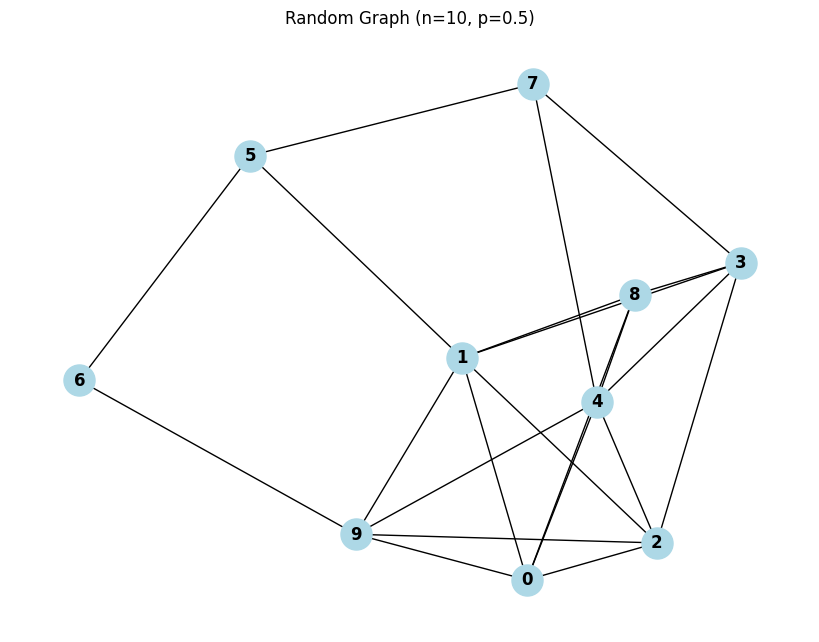

In [9]:
plt.figure(figsize=(8, 6))
nx.draw(Graph, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
plt.title(f'Random Graph (n={n}, p={p})')
plt.show()

## 2. Node2Vecのインスタンス化

In [11]:
# dimensions：埋め込みベクトルの次元数。各ノードがベクトルとして表現されるときの次元数。
# walk_length：1回のランダムウォークで移動するステップ数。ノード間のつながりを探索するときに、どれだけ深くグラフ内を移動するか。
# num_walks：各ノードから何回ランダムウォークを行うかを決める。
# workers：並列処理に使用するワーカースレッドの数。
node2vec = Node2Vec(Graph, dimensions=64, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

## 3. ノードの埋め込みを学習

In [12]:
# window：Skip-Gramモデルにおけるコンテキストウィンドウのサイズ。埋め込みベクトルを学習する際、ノードがどの程度の近傍ノードとの関係性を考慮するかを決める。
# min_count：埋め込みを学習する際に、無視する最小頻度のノード。頻度が低すぎるノード（つながりが少ないノード）は無視される。
# batch_words：1バッチあたりに処理する単語数（学習時のバッチサイズ）
model = node2vec.fit(window=10, min_count=1, batch_words=4)

## 4. ノードの埋め込みを取得

In [13]:
node_id = 1 # ノード1に対する埋め込みを取得
embedding = model.wv[str(node_id)]
print(f'ノード{node_id}の埋め込みベクトル：{embedding}')

ノード1の埋め込みベクトル：[-0.06638395 -0.09282146  0.21184173  0.2538888  -0.07747567 -0.25190744
  0.0790524   0.12721083 -0.13273163 -0.18962775  0.19117112  0.04693736
  0.09512943 -0.00962228 -0.06279436 -0.04013361 -0.10787155  0.09708589
 -0.01104558  0.02283026  0.10614716  0.1373572   0.24804193 -0.09423552
  0.14830655  0.18178515 -0.06213645  0.13111648 -0.11374174 -0.01190754
  0.01039253 -0.0913841  -0.09739385 -0.24869741  0.06968312  0.0316515
 -0.03741587  0.01030886  0.24796025 -0.07097062 -0.05008339  0.09717006
 -0.12501903 -0.10410243  0.03989496 -0.09085611  0.002825   -0.01547281
  0.00990059  0.08843426  0.0750328   0.04174952 -0.07402205  0.21273509
  0.12573405 -0.12132361 -0.06103407 -0.17134047 -0.05057935  0.08204702
 -0.03262223 -0.14172544 -0.17678803 -0.11796717]


## 5. 近いノードを確認

In [14]:
similar_nodes = model.wv.most_similar(str(node_id))
print(f'ノード{node_id}に類似したノード：{similar_nodes}')

ノード1に類似したノード：[('4', 0.9430314302444458), ('2', 0.9339926838874817), ('0', 0.9077131748199463), ('9', 0.9018140435218811), ('8', 0.8874400854110718), ('7', 0.8516935110092163), ('6', 0.8417357802391052), ('3', 0.8326737880706787), ('5', 0.8254855275154114)]
